In [7]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error

In [8]:
# we create points
with open('reacdata.pc','rb') as f:
    data = pickle.load(f)
x1 = np.array(data['pH'])
x2 = np.array(data['ratio S/A']) # Sampled data (with noise)
y = np.array(data['yield']) # True data
# Make data binary, 0 or 1
ybin = np.zeros(len(y))
ybin[y>0.45] = 1
X = np.array([x1,x2]).T # make a N x 2 matrix

========== depth = 1 ============
|--- feature_1 <= 0.90
|   |--- class: 0.0
|--- feature_1 >  0.90
|   |--- class: 1.0

========== depth = 2 ============
|--- feature_1 <= 0.90
|   |--- class: 0.0
|--- feature_1 >  0.90
|   |--- feature_0 <= 11.78
|   |   |--- class: 1.0
|   |--- feature_0 >  11.78
|   |   |--- class: 0.0

========== depth = 5 ============
|--- feature_1 <= 0.90
|   |--- class: 0.0
|--- feature_1 >  0.90
|   |--- feature_0 <= 11.78
|   |   |--- feature_0 <= 10.60
|   |   |   |--- feature_1 <= 1.87
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  1.87
|   |   |   |   |--- feature_0 <= 10.58
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_0 >  10.58
|   |   |   |   |   |--- class: 0.0
|   |   |--- feature_0 >  10.60
|   |   |   |--- feature_0 <= 11.60
|   |   |   |   |--- feature_1 <= 3.60
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_1 >  3.60
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_0 >  11.60
|   | 

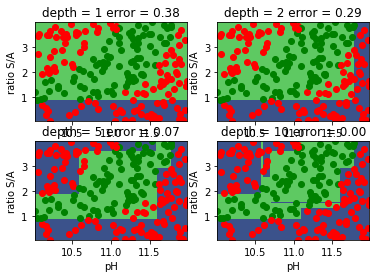

In [9]:
for i,depth in enumerate([1,2,5,10]):
    plt.subplot(2,2,i+1)
    # Create a tree model instance and fit to data
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X, ybin)
    # Use the model to predict the X data to calculate the error
    y_pred = model.predict(X)
    error = mean_absolute_error(y_pred, ybin)
    # Plot all binary data points with different colors
    for i in range(len(x1)):
        if ybin[i]: # 1
            plt.plot(x1[i], x2[i], 'go')
        else: # 0
            plt.plot(x1[i], x2[i], 'ro')
    # Create finely gridded x1 and x2
    Ngrid = 100
    x1_fine = np.linspace(np.min(x1), np.max(x1), Ngrid)
    x2_fine = np.linspace(np.min(x2), np.max(x2), Ngrid)
    X1, X2 = np.meshgrid(x1_fine,x2_fine)
    # Evaluate the model at all points
    Z = X1*0
    for row in range(Ngrid):
        for col in range(Ngrid):
            x = [[X1[row,col], X2[row,col]]] # The evaluated point must be2D
            Z[row,col] = model.predict(x)
    plt.contourf(X1, X2, Z, levels=1)
    plt.xlabel('pH')
    plt.ylabel('ratio S/A')
    plt.title(f'{depth = } {error = :.2f}')
    text_representation = tree.export_text(model)
    print(f'========== {depth = } ============')
    print(text_representation)